In [39]:
#Importing necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Creating the data frame
df = pd.read_csv("/content/Zomato-data.csv")

In [41]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [42]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [43]:
df.shape

(148, 7)

In [44]:
df.size

1036

In [45]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [46]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [47]:
#Data Cleaning and Preparation
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

In [48]:
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


/tmp/ipython-input-50-2787658345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['listed_in(type)'], palette="Set2")


Text(0.5, 0, 'Type of resturant')

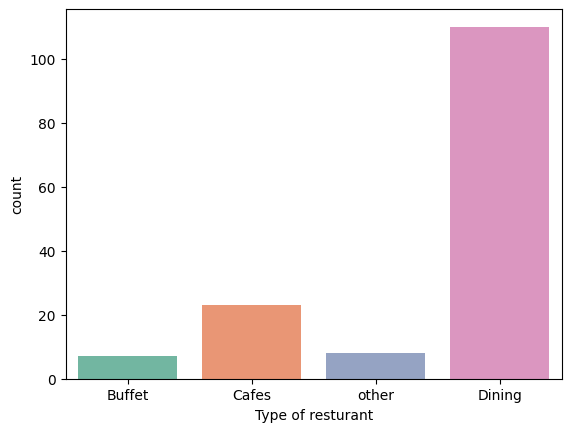

In [50]:
#Exploring Restaurant Types
sns.countplot(x = df['listed_in(type)'], palette="Set2")
plt.xlabel("Type of resturant")

Text(0, 0.5, 'Votes')

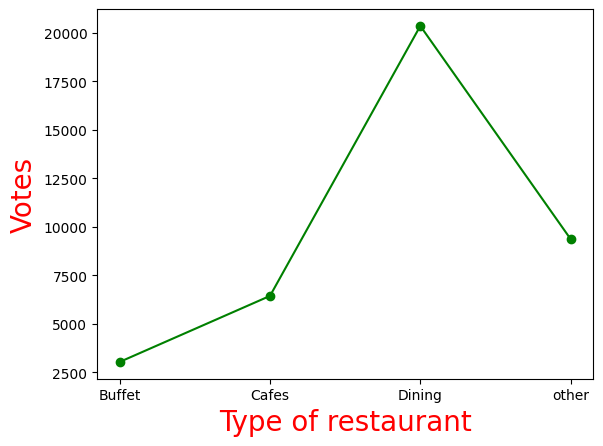

In [51]:
#Votes by Restaurant Type
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

In [52]:
#Identify the Most Voted Restaurant
max_votes = df['votes'].max()
resturant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Resturants with maximum votes:')
print(resturant_with_max_votes)

Resturants with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


/tmp/ipython-input-53-1822778202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['online_order'], palette= 'Set3')


<Axes: xlabel='online_order', ylabel='count'>

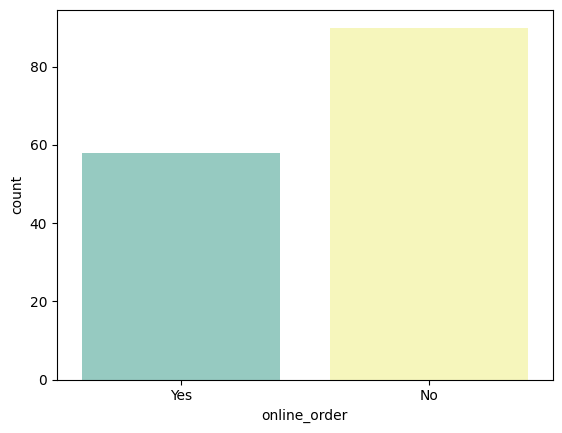

In [53]:
#Online Order Availability
sns.countplot(x = df['online_order'], palette= 'Set3')

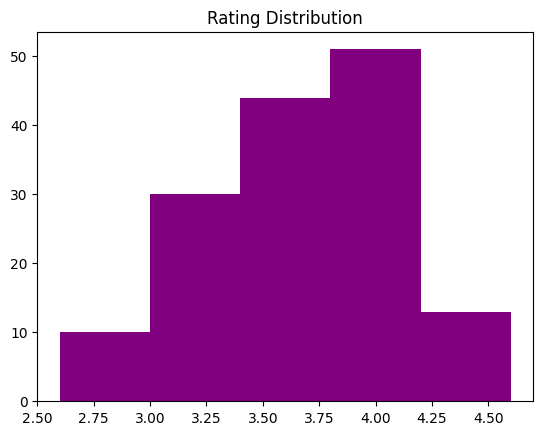

In [54]:
#Analyze Ratings
plt.hist(df['rate'],bins = 5, color= 'purple')
plt.title('Rating Distribution')
plt.show()

/tmp/ipython-input-55-74202670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data,palette="Set2")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

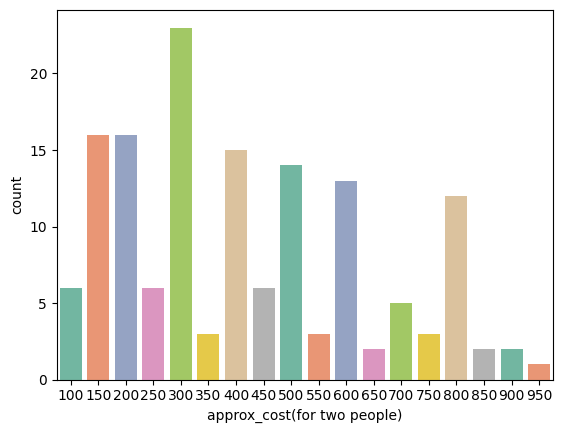

In [55]:
#Approximate Cost for Couples
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data,palette="Set2")

/tmp/ipython-input-56-3914437241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = df,palette="Set3")


<Axes: xlabel='online_order', ylabel='rate'>

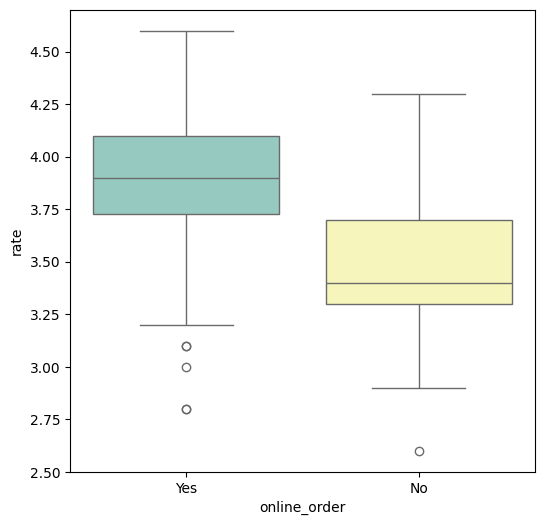

In [56]:
#Ratings Comparison - Online vs Offline Orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df,palette="Set3")

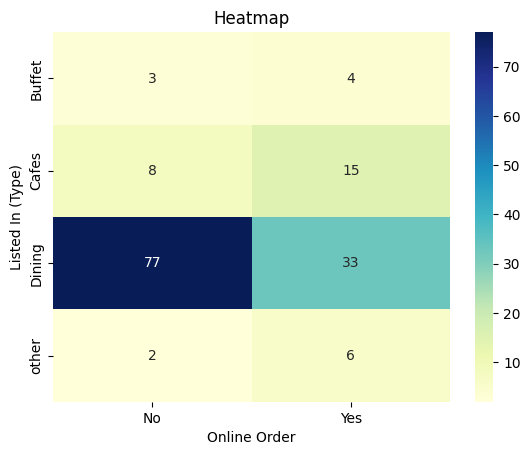

In [57]:
#Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()